<a href="https://colab.research.google.com/github/yuan-168/sklearn/blob/main/ml_fhr_s05_missed_appts_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Predicting Hospital No-Shows using Neural Networks #


### Contents: ###
1. Problem Description & Practical Plan
2. Task 1: Preparation: importing and loading data
3. Task 2: Data Preparation
4. Task 3: SMOTE & Scale
5. Task 4: Build and Evalute the Neural Model


## The Problem ##

### Why Predict Missed Appointments? ###

Approximately 20% of medical appointments that are booked are not attended in the UK. This costs an estimated £1 billion annually. If we were able to predict who might not show up, we could take targeted measures to encourage them to do so, such as tailored text alerts or a quick phone call. Let’s try and use machine learning to predict who might not show up to their appointment

## Practical Plan ##

Our aim is to use the **sklearn** package to Build a feed-forward Neural Network to predict no-show for hospital appointments

We will use a freely-available dataset which has been downloaded from **Kaggle** (https://www.kaggle.com/datasets)

### Steps: ###
a) Load the data<br>
b) Perform feature engineering to transform the data into an ML-digestible format<br>
c) Define the neural network<br>
d) Train & fit the neural network model<br>
e) Evaluate the model & make predictions.

## Task 1: Importing and Reading the Data  ##

Run the following cell to get the dataset from github

In [1]:
#
# Get data from github
#
!wget -nv https://github.com/kcl-bhi-is-01/datasets/raw/main/MissedAppointments.csv

2025-07-15 20:08:21 URL:https://raw.githubusercontent.com/kcl-bhi-is-01/datasets/main/MissedAppointments.csv [10739535/10739535] -> "MissedAppointments.csv" [1]


Use Pandas to read the file and examine its contents (using head(), tail(),  etc..)<br>

Plot a pie chart of the outcome variable *No_show* to understand the data distribution<br>

**Note:** You will need to obtain counts of the different categorical values in *No_show*, and use the `matplotlib` package, to produce the pie chart,

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

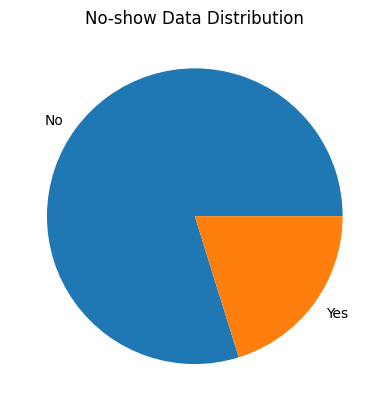

In [9]:
#
######### Your solution here ##########
#
import pandas as pd
rawData = pd.read_csv("MissedAppointments.csv",encoding= 'utf-8')
print(rawData.head())

import matplotlib.pyplot as plt
no_show_counts = rawData['No-show'].value_counts()

plt.figure(1)
plt.title('No-show Data Distribution')
plt.pie(no_show_counts,
        labels=no_show_counts.index, )

plt.show()

## Task 2: Data Preparation ##

### Task 2.1 Renaming and dropping columns  ###

The head() function reveals a few things:

a) It’s clear that there’s a few spelling errors; *Hipertension* and *Handcap*. Your task is to correct that by renaming the columns<br>
b) You can use the Pandas *rename* function. Here is the link to the documentation. It also contains useful examples: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html<br>
c) Check that your code has worked by examining the column names (i.e. data.columns) or using head() again<br>
d) The *PatientId* and *AppointmentID* columns are not useful as features. In fact, they shouldn't be used as features. Why do you think this is? Your task is to remove them from the dataframe. You can use the Pandas *drop* function. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html<br><br>
      
For Pandas *rename* and *drop* , take a note of the **inplace** argument and how it can be used.

In [21]:
#
######### Your solution here ##########
#

df = pd.DataFrame(rawData)
df.rename(columns={"Hipertension":"Hypertension","Handcap":"Handicap"}, inplace=True)
print(df.head())
df.drop(columns=['PatientId','AppointmentID'], inplace=True)
print(df.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handicap  SMS_received No-show  
0         0           0         0             0      No  
1         0           0         0   

### Task 2.2 Feature Engineering on Appointment Date ###

Use data.dtypes to see the data types of each feature in the dataframe<br>

An important thing for us to do before commencing our pipeline is to set the correct data types. For this we can use the function `.apply(np.[select a datatype])`<br>

For example, our columns *ScheduledDay* and *AppointmentDay* are currently **object** types but they should be **datetime** types<br>

Run the next cell to convert *ScheduledDay* and *AppointmentDay* to **datetime**

In [ ]:
#
# Convert ScheduledDay and AppointmentDay to datetime
#
import numpy as np
#
data.AppointmentDay = data.AppointmentDay.apply(np.datetime64)
data.ScheduledDay   = data.ScheduledDay.apply(np.datetime64)
#

Now that we have the columns in the right type, we can take our two features further. A factor that may play a big role in whether or not a person makes the appointment is the waiting time between scheduling and appointment. We can therefore create a new feature *WaitingTime* that calculates the difference in time between the scheduling date and appointment date. We can convert this feature into an integer feature then **drop** the actual date features!<br><br>

There's a nice function in Pandas called `to_timedelta`, which finds the difference betwen two datetime objects:  https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html. Your task is to use this function to calculate the waiting time, assigning this to a new column in your dataframe.  You can then drop the two columns *ScheduledDay* and *AppointmentDay*<br><br>

Note: `to_timedelta` returns a timedelta object, which contains components for the day, time, year, etc.. We want the difference in days, so we extract that specific component, and convert it into an integer object<br><br>

Run the following cell to create *WaitingTime* as the difference between *AppointmentDay* and *ScheduledDay*, after converting them to **timedelta**

In [ ]:
#
# Create WaitingTime column
#
import datetime as dt
#
data['WaitingTime'] = pd.to_timedelta((data['AppointmentDay'] - data['ScheduledDay'])).dt.days
data['WaitingTime'] = data['WaitingTime'].apply(np.int64)
#

Your task is to delete the columns *AppointmentDay* and *ScheduledDay* from your data frame, using the next cell

In [ ]:
#
######### Your solution here ##########
#

Now have a look at the values of WaitingTime. You could use `data.WaitingTime.unique()`


In [ ]:
#
######### Your solution here ##########
#

You can see that some patients have waiting time == -1. This generally designates walk-in appointments. Those rows should be removed because including such patients will skew the model. Your task is to:<br>

a) Remove the rows where patients have *WaitingTime* == -1<br>
b) Replot the distribution of the outcome.

In [ ]:
#
#### Your solution here ######
#
data.drop(data[data.WaitingTime == -1].index, inplace=True)
#
no_show_counts = data['No_show'].value_counts()
#
plt.pie([no_show_counts["Yes"], no_show_counts["No"]], labels=["Yes show","No show"])
plt.title('Hospital Appts')
plt.show()
#
print(data.shape)
#

What changes in the distribution are illustrated by the new pie chart?

### Task 2.3 Recoding categorical variables into integers ###

Currently, the outcome column *No_show* contains `Yes` for no_show patients and `No` for patients who attended their appointments. Similarly, the *gender* column contains `F` and `M`. Moreover, the *Neighbourhood* column contains 80 unique values! (check with `data.Neighbourhood.nunique()`)<br>

Machine learning (and deep learning) models, like those in **sklearn** and **Keras**, require all input and output variables to be numeric. This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.<br>

The two most popular techniques are **integer encoding** and **one-hot encoding**:<br>
a) Integer Encoding: Where each unique label is mapped to an integer<br>
b) One Hot Encoding: Where each label is mapped to a binary vector<br>

We will use integer encoding in this practical

**Integer (ordinal) encoding**<br>

You could use the Pandas `map` function to transform your categorical variables, But this is not the most efficient and generalisable way<br>

The **scikit-learn** package provides a class that encode categorical variables as integers, `LabelEncoder()`
(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)<br>

The correct way to encode data in a machine learning task, is to learn the encoding from a training data set and then apply it independently to the training set and the test set. Why do you think this is? What if a categorical label should be in the test set but not in the training set?<br>

**Your tasks** are to:<br>
a) Separate the dataset into *X*, containing all columns **except** the outcome value (*No_show*), and *y*, containing only the values in *No_show*<br>
b) Split *X* and *y* into *X_train*, *X_test*, and *y_train*, *y_test* using `train_test_split()`, from the `sklearn.model_selection` module. Assign 33% of the data to the test sets, and the remainder to training<br>

Note that the separation into *X* and *y* is because many other functions we will be using further on require this arangement

In [ ]:
#
#### Your solution here ####
#

The function given below, `label_encoder()`, takes a column from the training set, expects the same column from the test set, and generates an integer encoder model. The encoder is then applied to the training and test data

In [ ]:
#
# Run this cell to define the function label_encoder()
#
from sklearn.preprocessing import LabelEncoder
#
def label_encoder(train, test):
    #
    le = LabelEncoder()
    #
    le.fit(train)
    #
    train_enc = le.transform(train)
    test_enc  = le.transform(test)
    #
    return train_enc, test_enc
#
#

**Your task** is to use `label_encoder()` to re-code the categorical variables in `y_train`, `y_test`, `X_train`, and `X_test`,  

In [ ]:
#
#### Your solution here ####
#


## Task 3: Scaling & Preparation for Imbalanced Classification  ##

The pie charts have shown us that the dataset has a class inbalance<br>

We can use *Synthetic Minority Oversampling TEchnique* (SMOTE) to balance the training dataset and thus optimise model performance (https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)<br>

We ensure that our feature columns all scaled the same, so that they do not unfairly influence the model due to their relative magnitudes. Remember that the weighted sum, prior to activation, is sensitive to the magnitute of **x**<br><br>
Use the `StandardScaler` `fit()` and `transform()` functions from the `preprocessing` module in `sklearn` to apply normalized scaling

**Your** task is to:<br>

a) Use SMOTE from the *imblearn* package to *oversample* the **training data ONLY**<br>
b) Scale the dataset by fitting the scaler to the SMOTed training data, then using the `transform()` function to transform both training and test sets<br><br>

Why do you think we don't want to apply SMOTE to the test set?

In [ ]:
#
##### Your solution here #####
#

## Task 4: Train & Evaluate a Neural Network Using the Keras Library ##

*Keras* is a library for implementing neural networks. It's built on top of the *TensorFlow* architecture (https://keras.io/api/)<br>

Feed-forward networks are called *Sequential models* in Keras<br>

Fully-connected layers (where each neuron receives input from all neurons in the previous layers) are called *Dense layers* in Keras.


In [ ]:
#
# Run this cell to import keras modules for feed forward networks and fully connected layers
#
from keras.models import Sequential
from keras.layers import Dense
#

**Note that**<br>

a) Input layers are *implicit* in Keras. They are built with a one-to-one-correspondance to the number of features<br>
b) `input_dim` in the first *hidden* layer specifies the number of features (`input_dim` attribute)<br><br>

The model specified in the following cell consists of:<br><br>
a) A feed-forward network<br>
b) Three fully-connected (dense) layers<br>
c) The two hidden layers have 5 neurons each and use the *ReLU* activation function<br>
d) The last (output) layer has one neuron using the *sigmoid* activation function (to build a binary classifier)<br>

In [ ]:
#
# Create the keras model and add layers one by one, indicating the number of neurons and activation function
#
model = Sequential()
#
model.add(Dense(5, input_dim=10, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
#

Keras models need to be *compiled* before fitting them to the data. This is why we use the compile method in the cell below. The parameters we use are:<br>

**loss**: the function that measures the error (loss)<br>

**optimiser**: how the learning rate is optimised (you can read more about optimizers here: https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6)<br>

**metrics**: the metrics you'd like to see as part of the output during training (see below: we've selected AUC and you can see that AUC is produced at every epoch)<br>

In [ ]:
#
# Run this cell to compile the model
#
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["AUC"])
#

The cell below fits the compiled Keras model to the data

In [ ]:
#
# Run this cell to fit the model
#
model.fit(X_train, y_train, epochs=50, batch_size=10)
#

Run the next cell the use the model to predict results for the test set, and obtain performance metrics

In [ ]:
#
# Performance on test set
#
predictions = model.predict(X_test)
#
import sklearn.metrics as metrics
#
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
#
roc_auc = metrics.auc(fpr, tpr)
#
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#

### Some questions for you to consider ###

How do you choose the number of layers and neurons per layer?


How do you choose the numberr of training epochs?

You could try different combinations of number of layers and size of each layer, e.g. Only one hidden layer with 12 neurons.

**Note**: Start by running on only 5 epochs to get an idea of how the network performs

Is the network performace good? How do you explain the performance?

Is there any point in applying cross validation? Why?